# Beaderstadt UCI Mushroom Dataset: Classification Machine Learning Midterm<br>
**Author:** Alissa Beaderstadt<br>
**Date:** November 3, 2025<br>

## Introduction
In this project, I will explore the UCI Mushroom Dataset and apply classification models: Decision Tree, Support Vector Machine (SVM), and Neural Network. The goal is to predict whether a mushroom is edible or poisonous based on its features,
and then evaluate model performance using standard classification metrics.

## Imports
Import the necessary Python libraries for this notebook.

In [40]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

from matplotlib.colors import ListedColormap
from pandas.plotting import scatter_matrix
from sklearn.model_selection import train_test_split, StratifiedShuffleSplit
from sklearn.preprocessing import StandardScaler

# Models
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier

# Evaluation
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score

## Mushroom feature mappings

In [41]:
# Feature code mappings for Mushroom dataset
mushroom_mappings = {
    "class": {'e': 'edible', 'p': 'poisonous'},
    "cap-shape": {'b': 'bell', 'c': 'conical', 'x': 'convex', 'f': 'flat', 'k': 'knobbed', 's': 'sunken'},
    "cap-surface": {'f': 'fibrous', 'g': 'grooves', 'y': 'scaly', 's': 'smooth'},
    "cap-color": {'n': 'brown', 'b': 'buff', 'c': 'cinnamon', 'g': 'gray', 'r': 'green', 'p': 'pink', 'u': 'purple', 'e': 'red', 'w': 'white', 'y': 'yellow'},
    "bruises": {'t': 'bruises', 'f': 'no'},
    "odor": {'a': 'almond', 'l': 'anise', 'c': 'creosote', 'y': 'fishy', 'f': 'foul', 'm': 'musty', 'n': 'none', 'p': 'pungent', 's': 'spicy'},
    "gill-attachment": {'a': 'attached', 'd': 'descending', 'f': 'free', 'n': 'notched'},
    "gill-spacing": {'c': 'close', 'w': 'crowded', 'd': 'distant'},
    "gill-size": {'b': 'broad', 'n': 'narrow'},
    "gill-color": {'k': 'black', 'n': 'brown', 'b': 'buff', 'h': 'chocolate', 'g': 'gray', 'r': 'green', 'o': 'orange', 'p': 'pink', 'u': 'purple', 'e': 'red', 'w': 'white', 'y': 'yellow'},
    "stalk-shape": {'e': 'enlarging', 't': 'tapering'},
    "stalk-root": {'b': 'bulbous', 'c': 'club', 'u': 'cup', 'e': 'equal', 'z': 'rhizomorphs', 'r': 'rooted', '?': np.nan},
    "stalk-surface-above-ring": {'f': 'fibrous', 'y': 'scaly', 'k': 'silky', 's': 'smooth'},
    "stalk-surface-below-ring": {'f': 'fibrous', 'y': 'scaly', 'k': 'silky', 's': 'smooth'},
    "stalk-color-above-ring": {'n': 'brown', 'b': 'buff', 'c': 'cinnamon', 'g': 'gray', 'o': 'orange', 'p': 'pink', 'e': 'red', 'w': 'white', 'y': 'yellow'},
    "stalk-color-below-ring": {'n': 'brown', 'b': 'buff', 'c': 'cinnamon', 'g': 'gray', 'o': 'orange', 'p': 'pink', 'e': 'red', 'w': 'white', 'y': 'yellow'},
    "veil-type": {'p': 'partial'}, 
    "veil-color": {'n': 'brown', 'o': 'orange', 'w': 'white', 'y': 'yellow'},
    "ring-number": {'n': 'none', 'o': 'one', 't': 'two'},
    "ring-type": {'c': 'cobwebby', 'e': 'evanescent', 'f': 'flaring', 'l': 'large', 'n': 'none', 'p': 'pendant', 's': 'sheathing', 'z': 'zone'},
    "spore-print-color": {'k': 'black', 'n': 'brown', 'b': 'buff', 'h': 'chocolate', 'r': 'green', 'o': 'orange', 'u': 'purple', 'w': 'white', 'y': 'yellow'},
    "population": {'a': 'abundant', 'c': 'clustered', 'n': 'numerous', 's': 'scattered', 'v': 'several', 'y': 'solitary'},
    "habitat": {'g': 'grasses', 'l': 'leaves', 'm': 'meadows', 'p': 'paths', 'u': 'urban', 'w': 'waste', 'd': 'woods'}
}


## Section 1. Import and Inspect the Data
### 1.1 Load the UCI Mushroom Dataset
Import the external file. Assign column names to increase readability. Do a detailed inspection of the data. 

In [42]:
# Load the dataset
df = pd.read_csv("data/agaricus-lepiota.data", header=None)

# Assign column names
column_names = [
    "class","cap-shape","cap-surface","cap-color","bruises","odor",
    "gill-attachment","gill-spacing","gill-size","gill-color","stalk-shape",
    "stalk-root","stalk-surface-above-ring","stalk-surface-below-ring",
    "stalk-color-above-ring","stalk-color-below-ring","veil-type","veil-color",
    "ring-number","ring-type","spore-print-color","population","habitat"
]
df.columns = column_names

# Map feature codes to labels
for col, mapping in mushroom_mappings.items():
    df[col] = df[col].map(mapping)

# Display the first 10 rows
df.head(10)

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,poisonous,convex,smooth,brown,bruises,pungent,free,close,narrow,black,...,smooth,white,white,partial,white,one,pendant,black,scattered,urban
1,edible,convex,smooth,yellow,bruises,almond,free,close,broad,black,...,smooth,white,white,partial,white,one,pendant,brown,numerous,grasses
2,edible,bell,smooth,white,bruises,anise,free,close,broad,brown,...,smooth,white,white,partial,white,one,pendant,brown,numerous,meadows
3,poisonous,convex,scaly,white,bruises,pungent,free,close,narrow,brown,...,smooth,white,white,partial,white,one,pendant,black,scattered,urban
4,edible,convex,smooth,gray,no,none,free,crowded,broad,black,...,smooth,white,white,partial,white,one,evanescent,brown,abundant,grasses
5,edible,convex,scaly,yellow,bruises,almond,free,close,broad,brown,...,smooth,white,white,partial,white,one,pendant,black,numerous,grasses
6,edible,bell,smooth,white,bruises,almond,free,close,broad,gray,...,smooth,white,white,partial,white,one,pendant,black,numerous,meadows
7,edible,bell,scaly,white,bruises,anise,free,close,broad,brown,...,smooth,white,white,partial,white,one,pendant,brown,scattered,meadows
8,poisonous,convex,scaly,white,bruises,pungent,free,close,narrow,pink,...,smooth,white,white,partial,white,one,pendant,black,several,grasses
9,edible,bell,smooth,yellow,bruises,almond,free,close,broad,gray,...,smooth,white,white,partial,white,one,pendant,black,scattered,meadows


### 1.2 Check for missing values and display summary statistics.

In [43]:
# Check for missing values
missing_values = df.isnull().sum()
print("Missing values per column:\n", missing_values)

# Summary statistics for categorical features
summary_counts = df.describe(include='all')
summary_counts

Missing values per column:
 class                          0
cap-shape                      0
cap-surface                    0
cap-color                      0
bruises                        0
odor                           0
gill-attachment                0
gill-spacing                   0
gill-size                      0
gill-color                     0
stalk-shape                    0
stalk-root                  2480
stalk-surface-above-ring       0
stalk-surface-below-ring       0
stalk-color-above-ring         0
stalk-color-below-ring         0
veil-type                      0
veil-color                     0
ring-number                    0
ring-type                      0
spore-print-color              0
population                     0
habitat                        0
dtype: int64


,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,...,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,...,4,9,9,1,4,3,5,9,6,7
top,edible,convex,scaly,brown,no,none,free,close,broad,buff,...,smooth,white,white,partial,white,one,pendant,white,several,woods
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,...,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


**Reflection 1:**
- The dataset is fairly large, with 8124 mushrooms and 23 features, which should give the models plenty of data to learn from.
- There are missing values in the `stalk-root` feature (2480 entries), but the rest of the dataset looks clean with no unexpected entries.
- Some features that stand out as potentially informative for predicting poisonous mushrooms are `cap-shape`, `gill-color`, and `odor`.

## Section 2. Data Exploration and Preparation
### 2.1 Explore data patterns and distributions
Since all features in this dataset are categorical, I’ll use countplots to explore feature distributions.  

I’ll focus on features that are known to be strongly predictive of mushroom edibility, including:  
**odor, gill-color, cap-shape, bruises, and spore-print-color.**  

I’ll also examine the **target variable (`class`)** to check for any class imbalance.  

While exploring, I’ll look for:  
- **Patterns**: categories that are common or strongly associated with edibility/poisonous class.  
- **Outliers**: feature values that occur infrequently and may affect model performance.  
- **Anomalies**: unexpected values, missing entries, or features that provide little predictive value (single-value columns).

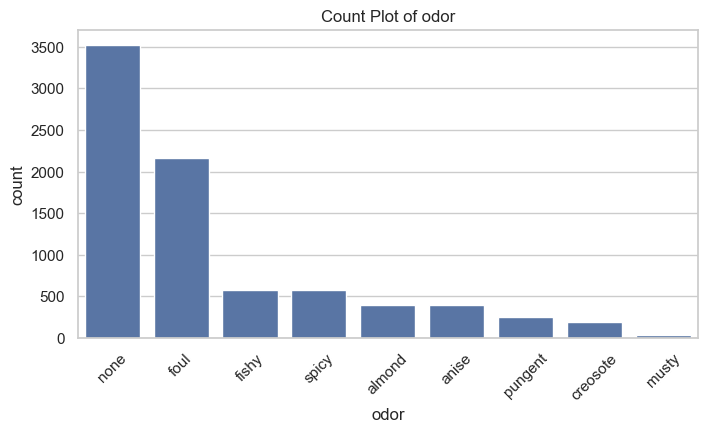

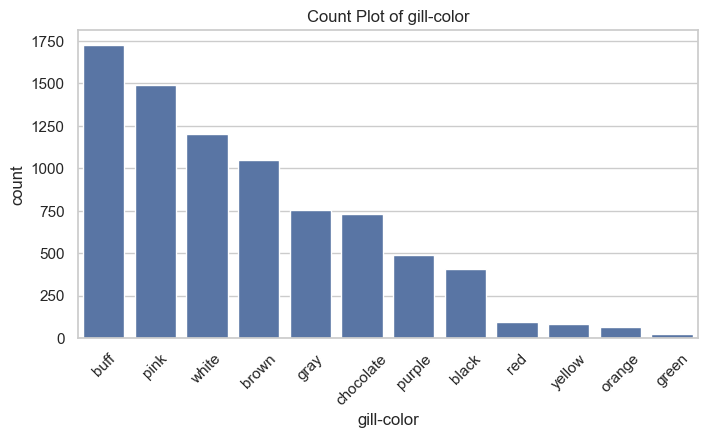

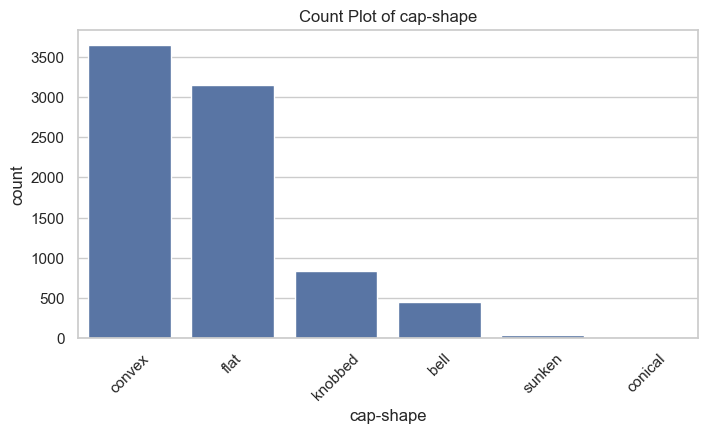

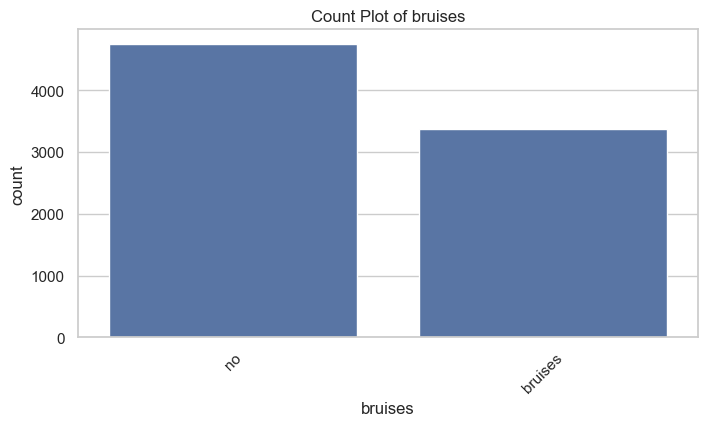

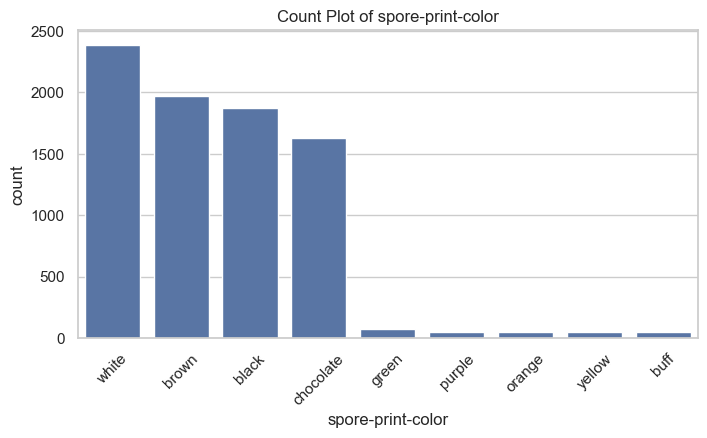

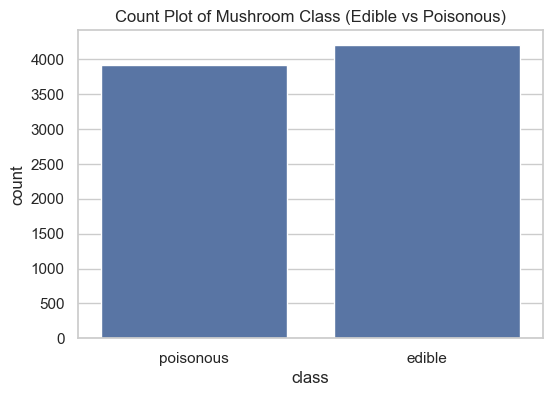

In [44]:
# Set plotting style
sns.set(style="whitegrid")

# Features to plot individually (most predictive)
key_features = ['odor', 'gill-color', 'cap-shape', 'bruises', 'spore-print-color']

for feature in key_features:
    plt.figure(figsize=(8,4))
    sns.countplot(data=df, x=feature, order=df[feature].value_counts().index)
    plt.title(f'Count Plot of {feature}')
    plt.xticks(rotation=45)
    plt.show()

# Plot target variable class balance
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='class')
plt.title('Count Plot of Mushroom Class (Edible vs Poisonous)')
plt.show()

`Note:`The target classes are fairly balanced, with roughly half the mushrooms being edible and half poisonous, which is good for training classification models without major bias.

### 2.2 Handle Missing Values and Clean Data

- The `stalk-root` feature has 2480 missing values (~30%). Rather than dropping rows, I’ll keep these as a separate `"missing"` category to preserve potential information.  
- Features like `veil-type` have only one category, so they won’t help prediction and will be dropped.  
- All remaining categorical features will be converted to numeric format using one-hot encoding so that models like SVM and Neural Networks can process them.


In [45]:
# 1. Handle missing values
df['stalk-root'] = df['stalk-root'].fillna('missing')  # convert NaN to "missing"

# 2. Drop uninformative features
if 'veil-type' in df.columns:
    df.drop(columns=['veil-type'], inplace=True)

# 3. One-hot encode all categorical features
X = df.drop('class', axis=1)
y = df['class']

X_encoded = pd.get_dummies(X, drop_first=True).astype(int)  # convert booleans to 0/1
y_encoded = y.map({'edible':0, 'poisonous':1})

# Quick check
print(f"Shape of feature matrix: {X_encoded.shape}")
X_encoded.head()
y_encoded.value_counts()


Shape of feature matrix: (8124, 95)


class
0    4208
1    3916
Name: count, dtype: int64

### 2.3 Feature Selection and Engineering

- Most features are already categorical and one-hot encoded, so no additional feature creation is necessary.  
- No transformations or combinations were added at this stage.  
- For tree-based models (Decision Tree, Random Forest), scaling is not needed.  
- For SVM and Neural Network models, I will scale the features using StandardScaler to normalize the numeric representation of one-hot encoded features.


In [46]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_encoded)  # only for SVM / Neural Network

**Reflection 2:**
- What patterns or anomalies do you see? 
- Do any features stand out? 
- What preprocessing steps were necessary to clean and improve the data?
- Did you create or modify any features to improve performance?

## Section 3. Feature Selection and Justification
### 3.1 Choose features and target
1) Select two or more input features (numerical for regression, numerical and/or categorical for classification)
2) Select a target variable (as applicable)
   1) Regression: Continuous target variable (e.g., price, temperature).
   2) Classification: Categorical target variable (e.g., gender, species).
   3) Clustering: No target variable.
3) Justify your selection with reasoning.

## 3.2 Define X and y
- Assign input features to X
- Assign target variable to y (as applicable)

In [49]:
# Code in this cell

**Reflection 3:**
- Why did you choose these features? 
- How might they impact predictions or accuracy?

## Section 4. Train a Model (Classification: Choose 1: Decision Tree, Random Forest, Logistic Regression)
### 4.1 Split the data into training and test sets using train_test_split (or StratifiedShuffleSplit if class imbalance is an issue).

In [47]:
# Code in this cell

### 4.2 Train model using Scikit-Learn model.fit() method.

In [48]:
# Code in this cell

### 4.3 Evalulate performance, for example:
- Regression: R^2, MAE, RMSE (RMSE has been recently updated)
- Classification: Accuracy, Precision, Recall, F1-score, Confusion Matrix
- Clustering: Inertia, Silhouette Score

In [ ]:
# Code in this cell

**Reflection 4:**
- How well did the model perform? 
- Any surprises in the results?

## Section 5. Improve the Model or Try Alternates (Implement a Second Option)
### 5.1 Train an alternative classifier (e.g., Decision Tree, Random Forest, Logistic Regression) OR adjust hyperparameters on the original model.

In [50]:
# Code in this cell

### 5.2 Compare performance of all models across the same performance metrics.

**Reflection 5:**
- Which model performed better? 
- Why might one classifier be more effective in this specific case?

## Section 6. Final Thoughts & Insights
### 6.1 Summarize findings.

### 6.2 Discuss challenges faced.

### 6.3 If you had more time, what would you try next?

**Reflection 6:**
- What did you learn from this project?